# Step 4 - Analysis of bicycle network results
## Project: Growing Urban Bicycle Networks with LTNs

This notebook takes the existing infrastructure, the results from 03_poi_based_generation and calculates/analyzes a number of measures:
* cost (length)
* coverage  
* directness  
* efficiency
* overlap with existing networks

Contact: Chris Larkin (c.larkin@ncl.ac.uk)  
Created: 2020-07-08  
Last modified: 2024-09-24

## Preliminaries

### Parameters

In [9]:
debug = True # If True, will produce plots and/or verbose output to double-check
rerun_existing = True # If True, will re-run the costly analysis of existing infra even if files already exist.
rerun = True # If True, recompute the analysis. If false, just re-make the plots
%run -i "../parameters/parameters.py"

Loaded parameters.



### Setup

In [10]:
%run -i path.py
%run -i setup.py
if not debug: # Only do this if sure the code is bug-free!
    warnings.filterwarnings('ignore')

%load_ext watermark
#%watermark -n -v -m -g -iv

Loaded PATH.



=== Cities ===
{   'sunderland': {   'countryid': 'gbr',
                      'name': 'Sunderland',
                      'nominatimstring': 'Sunderland'}}


Setup finished.

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


### Functions

In [11]:
%run -i functions.py

Loaded functions.



### Network weighting by tags

In [12]:
%run -i tag_lts.py
%run -i distance_cost.py

## Loading

### Load Results

In [ ]:
# get all results
results_list = []
for fp in Path(PATH["results"]).rglob("*_overall_results.pickle"):
    placeid = fp.parent.name
    data = pickle.load(fp.open("rb"))
    data["placeid"] = placeid
    results_list.append(data)
    print(f"Loaded {fp} with {len(data)} results")

list_data = defaultdict(list)
scalar_data = defaultdict(list)

# Separate results into iteration based and single value based
for res in results_list:
    for key, val in res.items():
        if isinstance(val, list) and all(isinstance(v, (int, float, np.number)) for v in val if v is not None):
            list_data[key].append(val)
        elif isinstance(val, (int, float, np.number)):
            scalar_data[key].append(val)


overall_results = {}
for key, list_of_lists in list_data.items():
    max_len = max(len(lst) for lst in list_of_lists)
    padded = np.full((len(list_of_lists), max_len), np.nan)
    for i, lst in enumerate(list_of_lists):
        padded[i, :len(lst)] = lst
    overall_results[key] = np.nanmean(padded, axis=0).tolist()
for key, values in scalar_data.items():
    overall_results[key] = float(np.nanmean(values))  

Loaded ..\..\bikenwgrowth_external\results\gateshead\gateshead_analysis_results.pickle with 89 results
Loaded ..\..\bikenwgrowth_external\results\newcastle\newcastle_analysis_results.pickle with 90 results
Loaded ..\..\bikenwgrowth_external\results\north_tyneside\north_tyneside_analysis_results.pickle with 87 results
Loaded ..\..\bikenwgrowth_external\results\south_tyneside\south_tyneside_analysis_results.pickle with 87 results
Loaded ..\..\bikenwgrowth_external\results\sunderland\sunderland_analysis_results.pickle with 60 results


# Saving Setup

In [14]:
overall_results_path = os.path.join(PATH["plots"], "overall_results")
os.makedirs(overall_results_path, exist_ok=True)
PATH["overall_results"] = overall_results_path

# Lengths

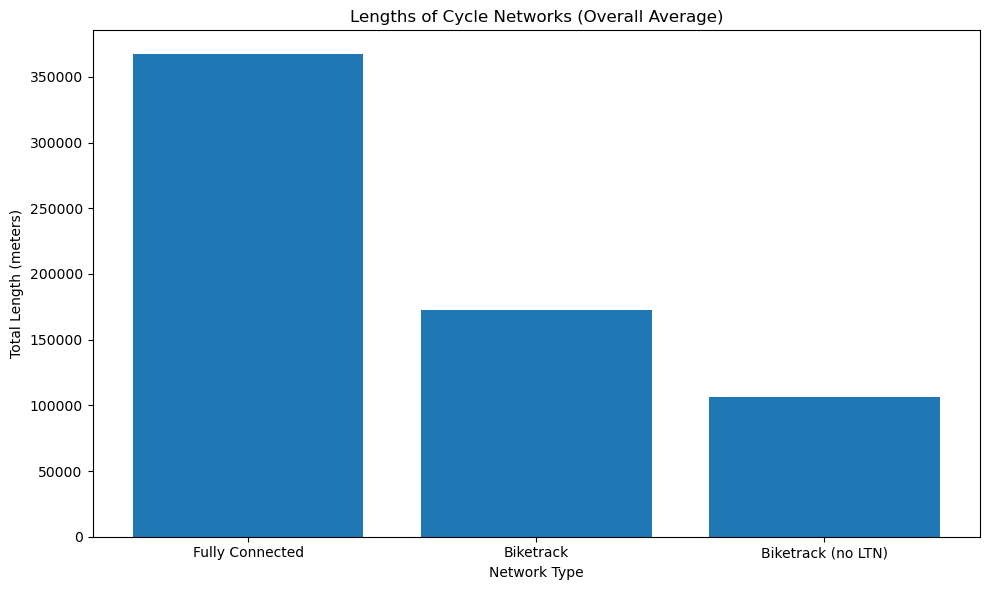

Total length of fully connected network: 367074.30 m
Total length of G_biketrack: 172747.18 m
Total length of G_biketrack_no_ltn: 106424.29 m
Difference in total length: 66322.89 m


In [15]:
# Prepare data for plotting
labels = ['Fully Connected', 'Biketrack', 'Biketrack (no LTN)']
values = [
    overall_results['total_network_length'],
    overall_results['total_biketrack_length'],
    overall_results['total_biketrack_no_ltn_length']
]


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xlabel('Network Type')
plt.ylabel('Total Length (meters)')
plt.title('Lengths of Cycle Networks (Overall Average)')
plt.tight_layout()
output_path = overall_results_path + "/cycleLengths_avg.png"
plt.savefig(output_path, dpi=300)
plt.show()

# Print statements
print(f"Total length of fully connected network: {overall_results['total_network_length']:.2f} m")
print(f"Total length of G_biketrack: {overall_results['total_biketrack_length']:.2f} m")
print(f"Total length of G_biketrack_no_ltn: {overall_results['total_biketrack_no_ltn_length']:.2f} m")
print(f"Difference in total length: {overall_results['length_difference']:.2f} m")


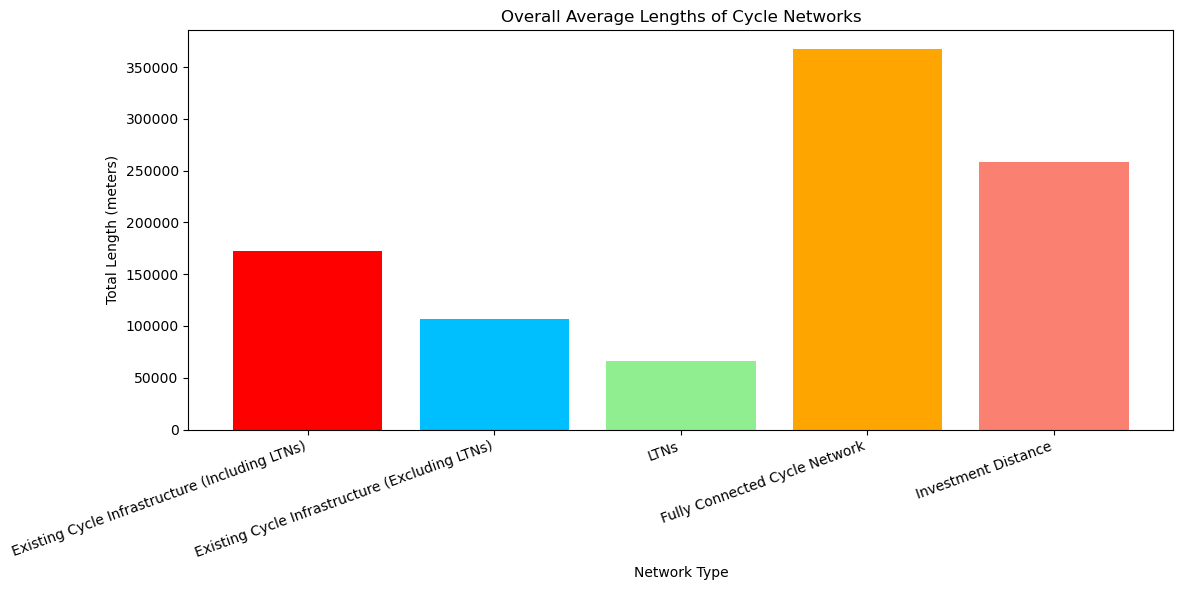

Total length of fully connected network: 367074.30 m
Total length of G_biketrack: 172747.18 m
Total length of G_biketrack_no_ltn: 106424.29 m
Length of LTN-only infrastructure: 66322.89 m
Total investment distance: 257997.91 m


In [16]:
ltn_only_length = abs(
    overall_results['total_biketrack_length'] - overall_results['total_biketrack_no_ltn_length']
)

# Reconstruct plotting values from overall_results
length_comparison_labels = [
    "Existing Cycle Infrastructure (Including LTNs)",
    "Existing Cycle Infrastructure (Excluding LTNs)", 
    "LTNs",
    "Fully Connected Cycle Network",
    "Investment Distance"
]

length_comparison_values = [
    overall_results['total_biketrack_length'],
    overall_results['total_biketrack_no_ltn_length'],
    ltn_only_length,
    overall_results['total_network_length'],
    overall_results['total_investment_length']
]

length_comparison_colors = [
    'red',
    'deepskyblue',
    'lightgreen',
    'orange',
    'salmon'
]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(
    length_comparison_labels,
    length_comparison_values,
    color=length_comparison_colors
)
plt.xticks(rotation=20, ha='right')
plt.xlabel('Network Type')
plt.ylabel('Total Length (meters)')
plt.title('Overall Average Lengths of Cycle Networks')
plt.tight_layout()
output_path = overall_results_path + "/allLengths_avg.png"
plt.savefig(output_path, dpi=300)
plt.show()

# Print key stats
print(f"Total length of fully connected network: {overall_results['total_network_length']:.2f} m")
print(f"Total length of G_biketrack: {overall_results['total_biketrack_length']:.2f} m")
print(f"Total length of G_biketrack_no_ltn: {overall_results['total_biketrack_no_ltn_length']:.2f} m")
print(f"Length of LTN-only infrastructure: {ltn_only_length:.2f} m")
print(f"Total investment distance: {overall_results['total_investment_length']:.2f} m")

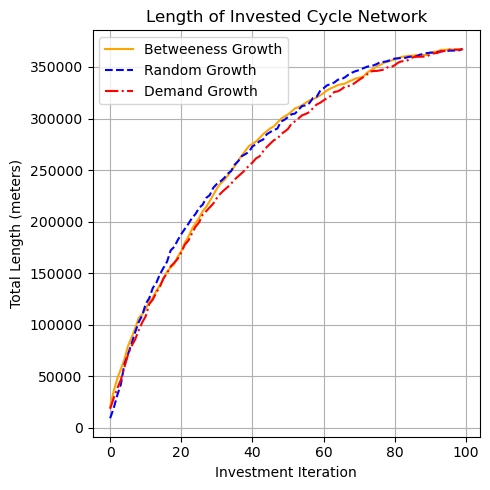

In [17]:
# how much budget is used per iteration
plt.figure(figsize=(5, 5))
plt.plot(overall_results['total_lengths'], linestyle='-', color='orange', label='Betweeness Growth')
plt.plot(overall_results['random_total_lengths'], linestyle='--', color='blue', label='Random Growth')
plt.plot(overall_results['demand_total_lengths'], linestyle='-.', color='red', label='Demand Growth')
plt.xlabel('Investment Iteration')
plt.ylabel('Total Length (meters)')
plt.title('Length of Invested Cycle Network')
plt.legend()
plt.grid(True)
plt.tight_layout()

output_path = overall_results_path + "/loInvestment_avg.png"
plt.savefig(output_path, dpi=300)

plt.show()


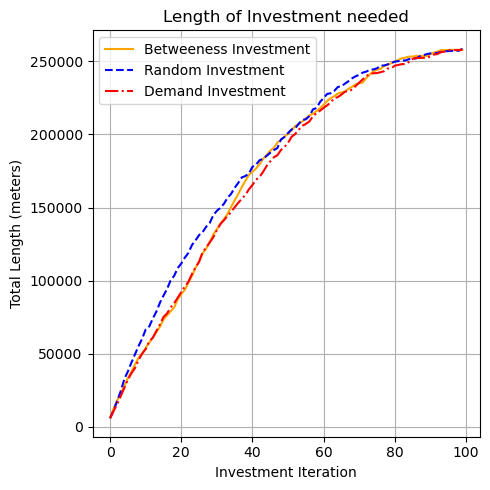

In [18]:
# actual investment length
plt.figure(figsize=(5, 5))
plt.plot(overall_results['total_investment_lengths'],        '-',  color='orange', label='Betweeness Investment')
plt.plot(overall_results['random_total_investment_lengths'], '--', color='blue',   label='Random Investment')
plt.plot(overall_results['demand_total_investment_lengths'], '-.', color='red',    label='Demand Investment')
plt.xlabel('Investment Iteration')
plt.ylabel('Total Length (meters)')
plt.title('Length of Investment needed')
plt.legend()
plt.grid(True)
plt.tight_layout()

output_path = overall_results_path + "/RequiredloInvestment_avg.png"
plt.savefig(output_path, dpi=300)

plt.show()

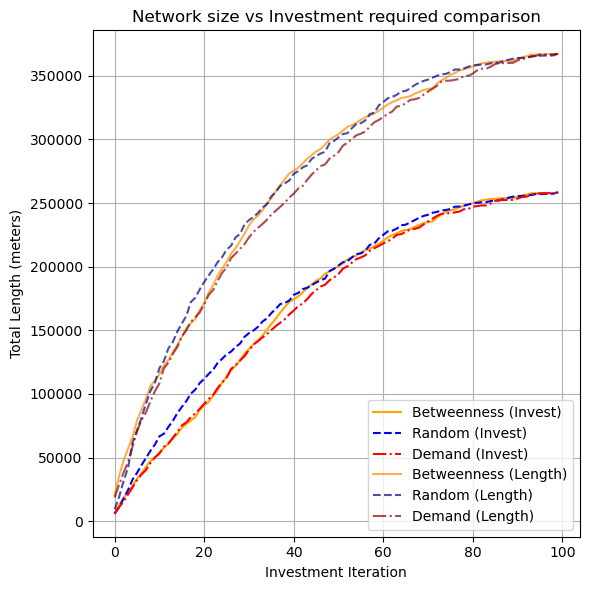

In [19]:
# both on one plot
plt.figure(figsize=(6, 6))
plt.plot(overall_results['investment_total_lengths'],        '-',  color='orange',    label='Betweenness (Invest)')
plt.plot(overall_results['random_investment_total_lengths'], '--', color='blue',     label='Random (Invest)')
plt.plot(overall_results['demand_investment_total_lengths'], '-.', color='red',      label='Demand (Invest)')
plt.plot(overall_results['length_total_lengths'],            '-',  color='darkorange', alpha=0.7, label='Betweenness (Length)')
plt.plot(overall_results['random_length_total_lengths'],     '--', color='darkblue',   alpha=0.7, label='Random (Length)')
plt.plot(overall_results['demand_length_total_lengths'],     '-.', color='darkred',    alpha=0.7, label='Demand (Length)')

plt.xlabel('Investment Iteration')
plt.ylabel('Total Length (meters)')
plt.title('Network size vs Investment required comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()

output_path = overall_results_path + "/Required_vs_networksize_loInvestment.png"
plt.savefig(output_path, dpi=300)
plt.show()

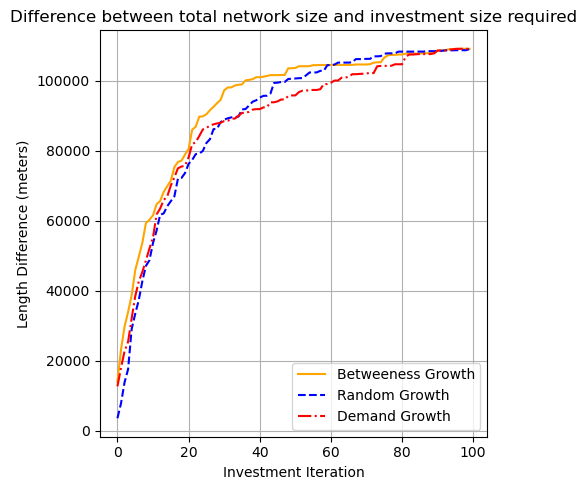

In [20]:
# differance between total network size and investment required
plt.figure(figsize=(5, 5))
plt.plot(overall_results['length_differences'],         '-',  color='orange', label='Betweeness Growth')
plt.plot(overall_results['random_length_differences'],  '--', color='blue',  label='Random Growth')
plt.plot(overall_results['demand_length_differences'],  '-.', color='red',   label='Demand Growth')  # demand line
plt.xlabel('Investment Iteration')
plt.ylabel('Length Difference (meters)')
plt.title('Difference between total network size and investment size required')
plt.legend()
plt.grid(True)
plt.tight_layout()
output_path = overall_results_path +  "/loInvestment_diff_avg.png"
plt.savefig(output_path, dpi=300)

plt.show()

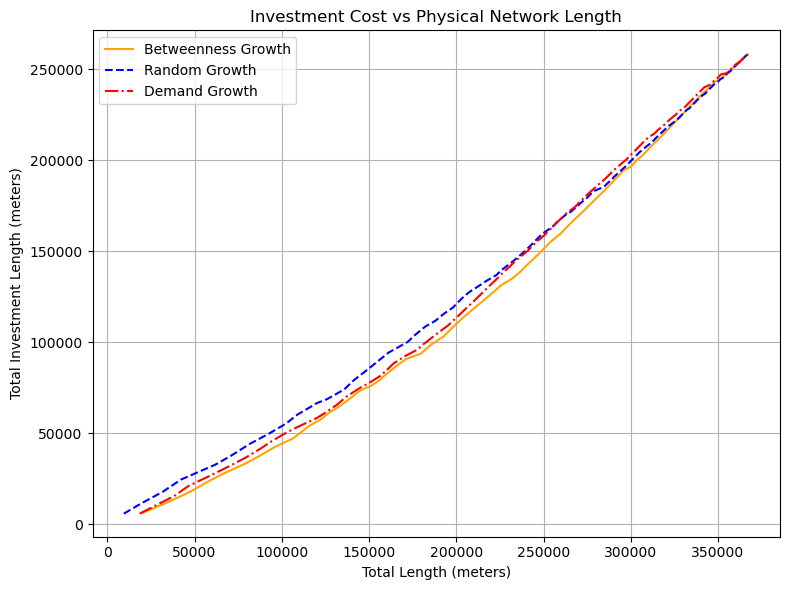

In [21]:
# investment cost vs physical network length

plt.figure(figsize=(8, 6))
plt.plot(
    overall_results['lengths_list'], 
    overall_results['investment_lengths_list'], 
    '-', color='orange', label='Betweenness Growth'
)
plt.plot(
    overall_results['random_lengths_list'], 
    overall_results['random_investment_lengths_list'], 
    '--', color='blue', label='Random Growth'
)
plt.plot(
    overall_results['demand_lengths_list'], 
    overall_results['demand_investment_lengths_list'], 
    '-.', color='red', label='Demand Growth'
)
plt.xlabel('Total Length (meters)')
plt.ylabel('Total Investment Length (meters)')
plt.title('Investment Cost vs Physical Network Length')
plt.legend()
plt.grid(True)
plt.tight_layout()
output_path = overall_results_path + "/loInvestmentcost_vs_length_avg.png"
plt.savefig(output_path, dpi=300)

plt.show()

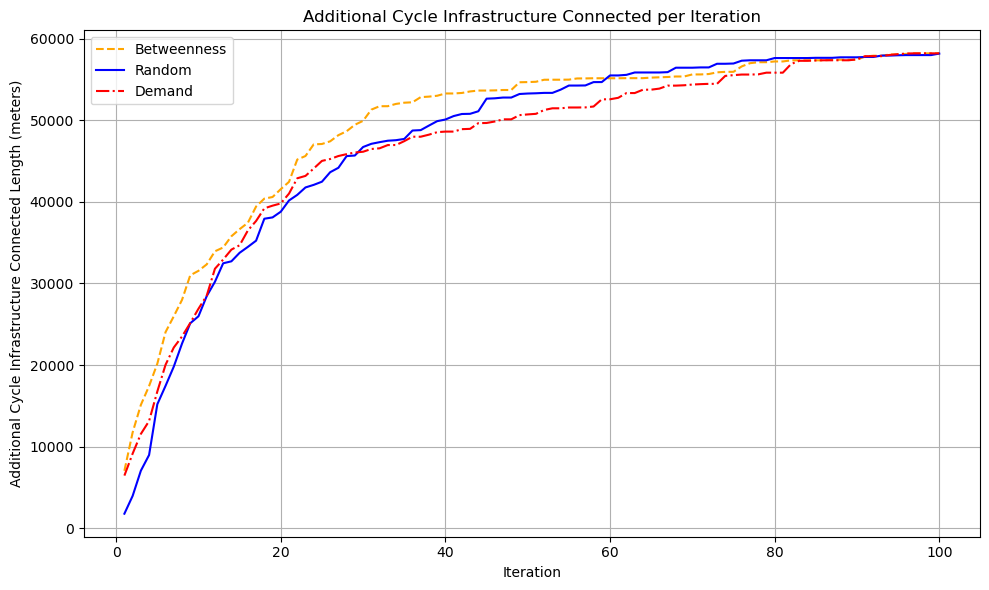

In [22]:
# distance gained
# Plot just the bike track connected lengths 
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(overall_results['biketrack_lengths']) + 1),
    overall_results['biketrack_lengths'],
    '--', color='orange', label="Betweenness"
)
plt.plot(
    range(1, len(overall_results['biketrack_random_lengths']) + 1),
    overall_results['biketrack_random_lengths'],
    '-', color='blue', label="Random"
)

plt.plot(
    range(1, len(overall_results['biketrack_demand_lengths']) + 1),
    overall_results['biketrack_demand_lengths'],
    '-.', color='red', label="Demand"
)

plt.xlabel("Iteration")
plt.ylabel("Additional Cycle Infrastructure Connected Length (meters)")
plt.title("Additional Cycle Infrastructure Connected per Iteration")
plt.legend()
plt.grid(True)
plt.tight_layout()
output_path = overall_results_path +  "/additional_cyclenet_connected_avg.png"
plt.savefig(output_path, dpi=300)
plt.show()

# Connected Components

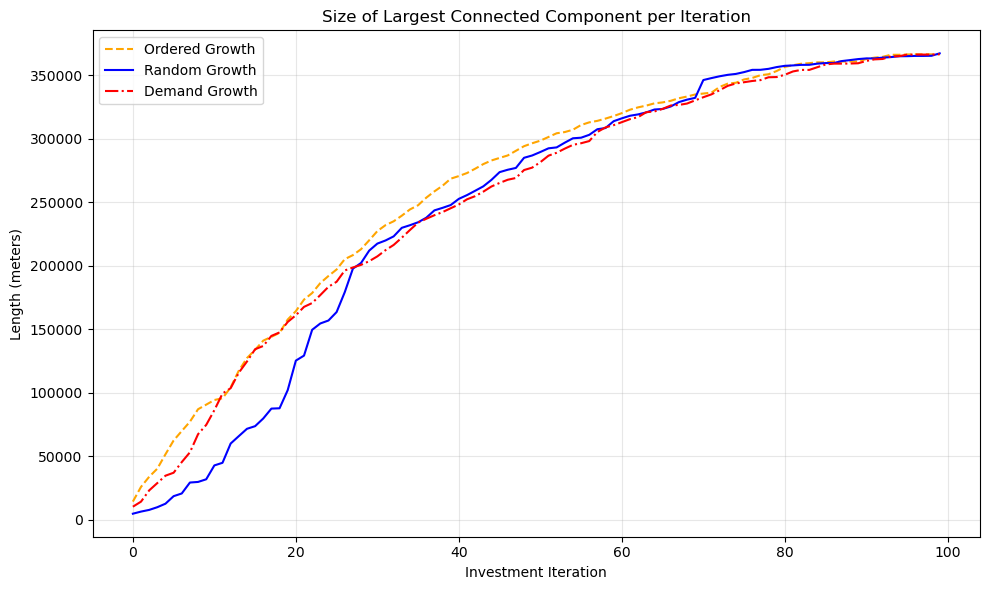

In [23]:
# Plot LCC lengths
plt.figure(figsize=(10, 6))
plt.plot(
    overall_results['lcc_lengths_GTs'], 
    '--', color='orange', label='Ordered Growth'
)
plt.plot(
    overall_results['lcc_lengths_GTs_random'], 
    '-', color='blue', label='Random Growth'
)

plt.plot(
    overall_results['lcc_lengths_GTs_demand'],
    '-.', color='red', label='Demand Growth'
)
plt.xlabel('Investment Iteration')
plt.ylabel('Length (meters)')
plt.title('Size of Largest Connected Component per Iteration')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
output_path = overall_results_path + "/size_of_lcc_avg.png"
plt.savefig(output_path, dpi=300)
plt.show()

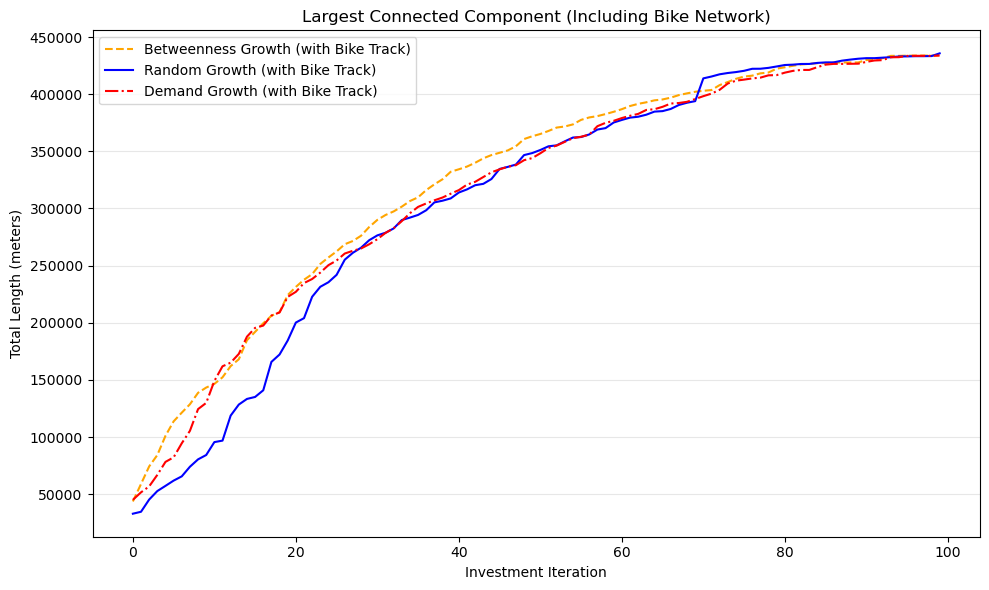

In [24]:
# LCC including addtional cycle network
plt.figure(figsize=(10, 6))
plt.plot(
    overall_results['composite_lcc_GTs'],
    '--', color='orange',
    label='Betweenness Growth (with Bike Track)'
)
plt.plot(
    overall_results['composite_lcc_GTs_random'],
    '-', color='blue',
    label='Random Growth (with Bike Track)'
)
plt.plot(
    overall_results['composite_lcc_GTs_demand'],
    '-.', color='red',
    label='Demand Growth (with Bike Track)'
)

plt.title('Largest Connected Component (Including Bike Network)')
plt.xlabel('Investment Iteration')
plt.ylabel('Total Length (meters)')
plt.grid(True, axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
output_path = overall_results_path + "/lengthof_lcc_inc_cyclenet_avg.png"
plt.savefig(output_path, dpi=300)
plt.show()

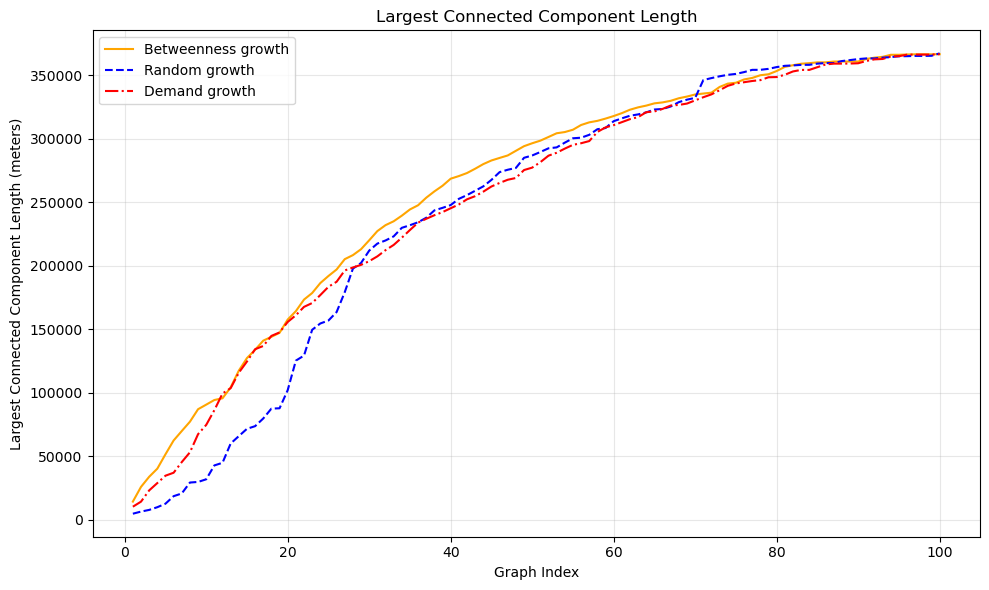

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(overall_results['lcc_lengths_GTs']) + 1), 
    overall_results['lcc_lengths_GTs'], 
    linestyle='-', color='orange',  
    label="Betweenness growth"
)
plt.plot(
    range(1, len(overall_results['lcc_lengths_GTs_random']) + 1), 
    overall_results['lcc_lengths_GTs_random'], 
    linestyle='--', color='blue', 
    label="Random growth"
)
plt.plot(
    range(1, len(overall_results['lcc_lengths_GTs_demand']) + 1), 
    overall_results['lcc_lengths_GTs_demand'], 
    linestyle='-.', color='red', 
    label="Demand growth"
)
plt.xlabel("Graph Index")
plt.ylabel("Largest Connected Component Length (meters)")
plt.title("Largest Connected Component Length")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
output_path = overall_results_path + "/lcc_length_avg.png"
plt.savefig(output_path, dpi=300)
plt.show()


# Coverage

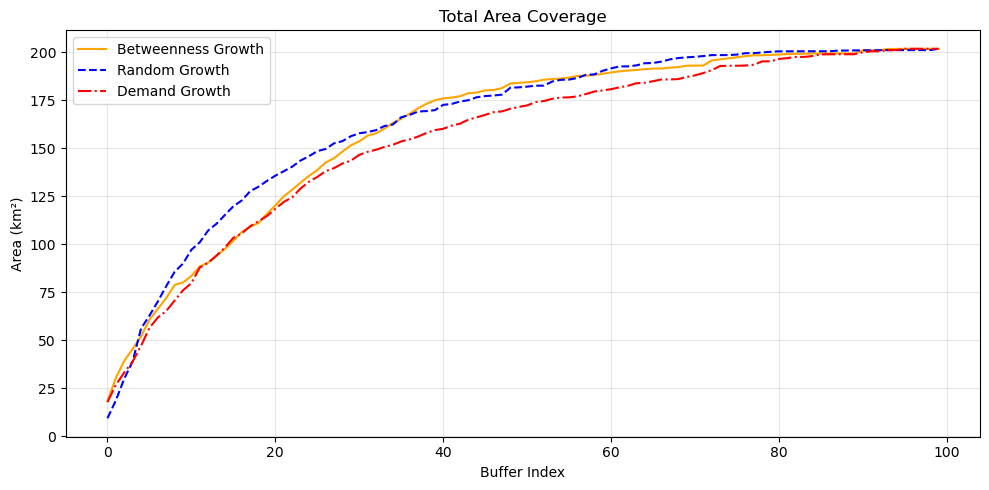

In [26]:
# Plotting - Area (km²)
plt.figure(figsize=(10, 5))
plt.plot(
    overall_results['buffer_areas'], 
    color='orange', 
    linestyle='-', 
    label='Betweenness Growth'
)
plt.plot(
    overall_results['random_buffer_areas'], 
    color='blue', 
    linestyle='--', 
    label='Random Growth'
)
plt.plot(
    overall_results['demand_buffer_areas'], 
    color='red', 
    linestyle='-.', 
    label='Demand Growth'
)
plt.xlabel('Buffer Index')
plt.ylabel('Area (km²)')
plt.title('Total Area Coverage')
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.3)
output_path = overall_results_path + "/area_coverage_km2_avg.png"
plt.savefig(output_path, dpi=300)

plt.show()

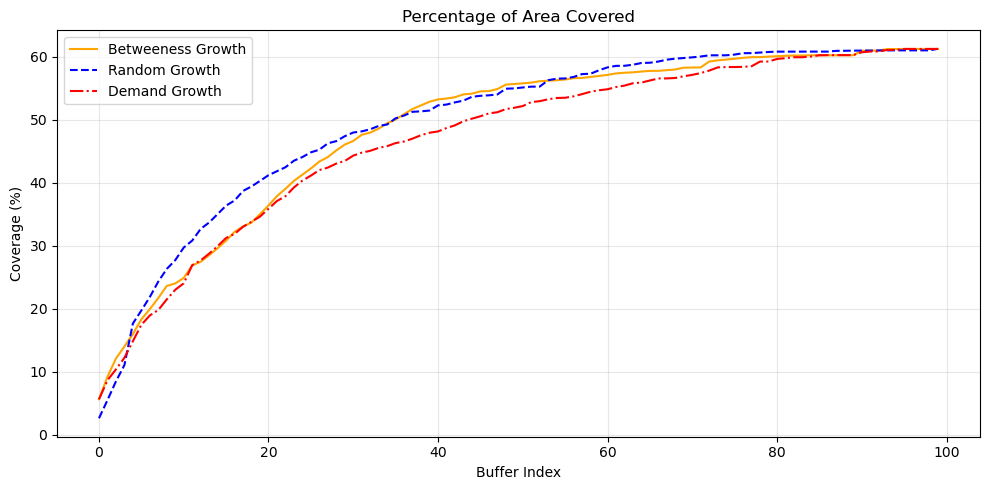

In [27]:
# Plotting - Percentage Coverage
plt.figure(figsize=(10, 5))
plt.plot(
    overall_results['buffer_percentages'], 
    color='orange', 
    linestyle='-', 
    label='Betweeness Growth'
)
plt.plot(
    overall_results['random_buffer_percentages'], 
    color='blue', 
    linestyle='--', 
    label='Random Growth'
)
plt.plot(
    overall_results['demand_buffer_percentages'], 
    color='red', 
    linestyle='-.', 
    label='Demand Growth'
)
plt.xlabel('Buffer Index')
plt.ylabel('Coverage (%)')
plt.title('Percentage of Area Covered')
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.3)
output_path = overall_results_path + "/boundary_cov_percentage_avg.png"
plt.savefig(output_path, dpi=300)

plt.show()

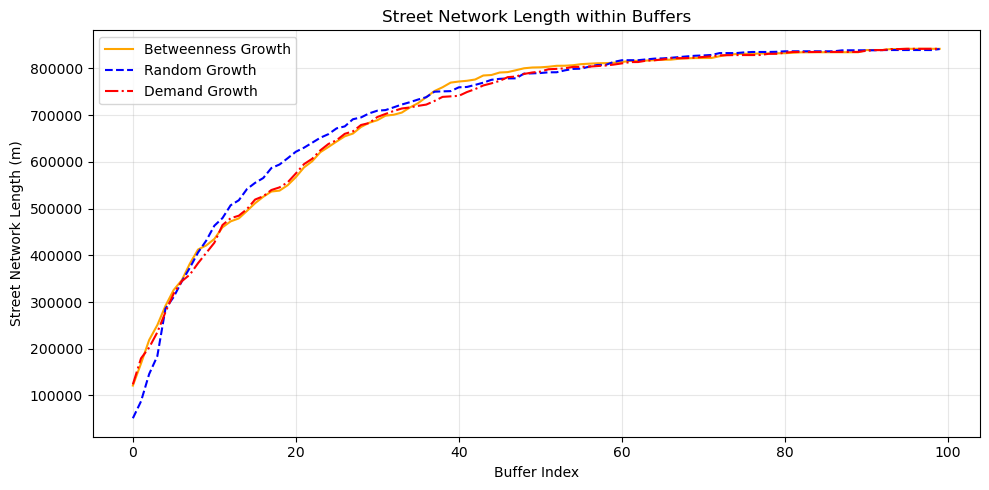

In [28]:
# Plot: Network Length within Buffers
plt.figure(figsize=(10, 5))
plt.plot(overall_results['street_cov_lengths'], color='orange', linestyle='-', label='Betweenness Growth')
plt.plot(overall_results['random_street_cov_lengths'], color='blue', linestyle='--', label='Random Growth')
plt.plot(overall_results['demand_street_cov_lengths'], color='red', linestyle='-.', label='Demand Growth')
plt.xlabel('Buffer Index')
plt.ylabel('Street Network Length (m)')
plt.title('Street Network Length within Buffers')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
output_path = overall_results_path + "/streets_within_cyclenet_avg.png"
plt.savefig(output_path, dpi=300)

plt.show()

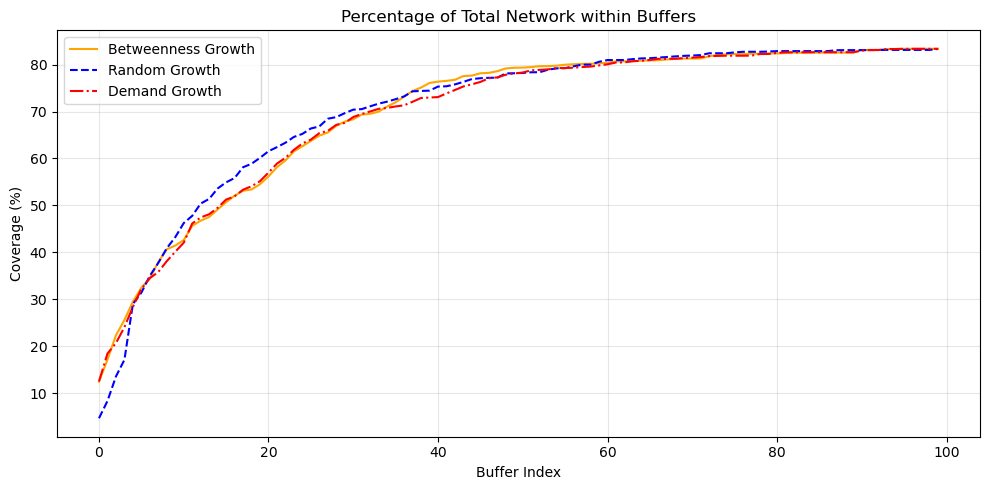

In [29]:
# percentage of streets
plt.figure(figsize=(10, 5))
plt.plot(overall_results['street_cov_percentages'], color='orange', linestyle='-', label='Betweenness Growth')
plt.plot(overall_results['random_street_cov_percentages'], color='blue', linestyle='--', label='Random Growth')
plt.plot(overall_results['demand_street_cov_percentages'], color='red', linestyle='-.', label='Demand Growth')
plt.xlabel('Buffer Index')
plt.ylabel('Coverage (%)')
plt.title('Percentage of Total Network within Buffers')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
output_path = overall_results_path + "/percentage_within_cyclenet_avg.png"
plt.savefig(output_path, dpi=300)

plt.show()

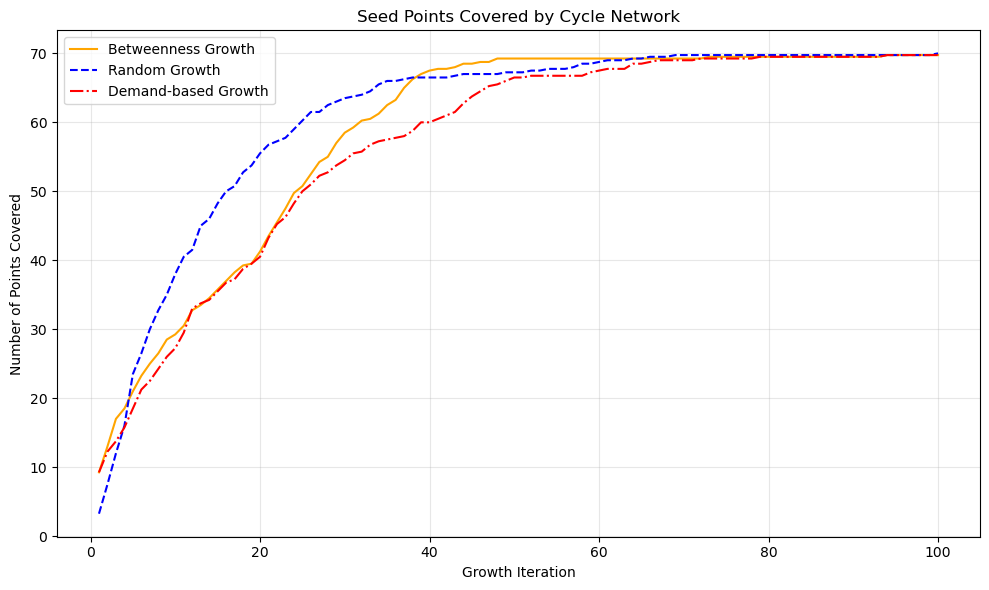

In [30]:
# seed points
plt.figure(figsize=(10, 6))
x_vals = range(1, len(overall_results['points_covered_GT']) + 1)

plt.plot(
    x_vals,
    overall_results['points_covered_GT'],
    color='orange',
    linestyle='-',
    label='Betweenness Growth'
)
plt.plot(
    x_vals,
    overall_results['points_covered_random'],
    color='blue',
    linestyle='--',
    label='Random Growth'
)
plt.plot(
    x_vals,
    overall_results['points_covered_demand'],
    color='red',
    linestyle='-.',
    label='Demand-based Growth'
)

plt.xlabel('Growth Iteration')
plt.ylabel('Number of Points Covered')
plt.title('Seed Points Covered by Cycle Network')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
output_path = overall_results_path +  "/seed_point_coverage_avg.png"
plt.savefig(output_path, dpi=300)

plt.show()

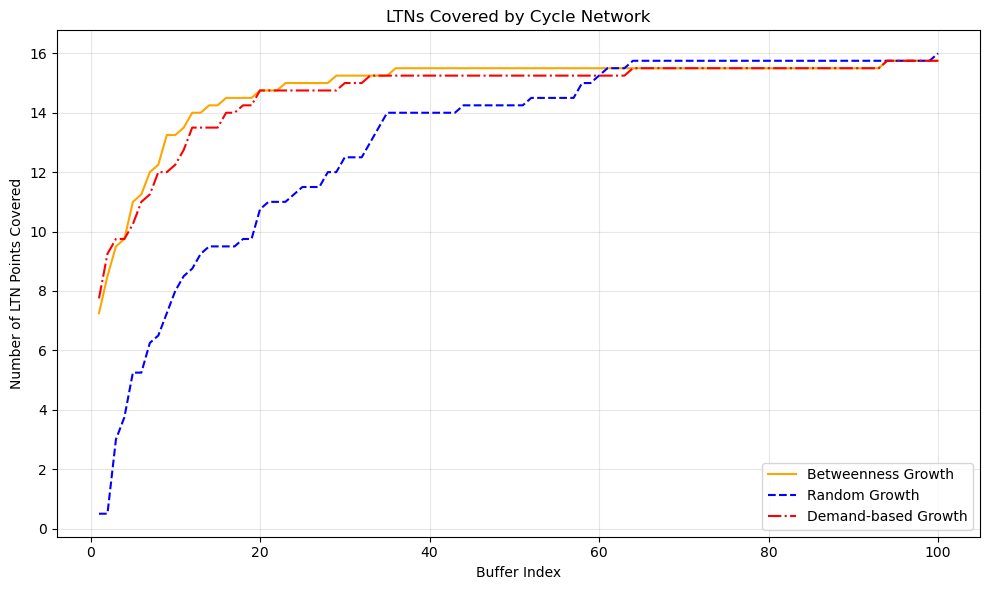

In [ ]:
# ltns
plt.figure(figsize=(10, 6))
x_vals = range(1, len(overall_results['ltn_points_covered_GT']) + 1)

plt.plot(
    x_vals,
    overall_results['ltn_points_covered_GT'],
    color='orange',
    linestyle='-',
    label='Betweenness Growth'
)
plt.plot(
    x_vals,
    overall_results['ltn_points_covered_random'],
    color='blue',
    linestyle='--',
    label='Random Growth'
)
plt.plot(
    x_vals,
    overall_results['ltn_points_covered_demand'],
    color='red',
    linestyle='-.',
    label='Demand-based Growth'
)

plt.xlabel('Growth Iteration')
plt.ylabel('Number of LTN Points Covered')
plt.title('LTNs Covered by Cycle Network')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
output_path = overall_results_path + "/ltns_coverage_avg.png"
plt.savefig(output_path, dpi=300)

plt.show()


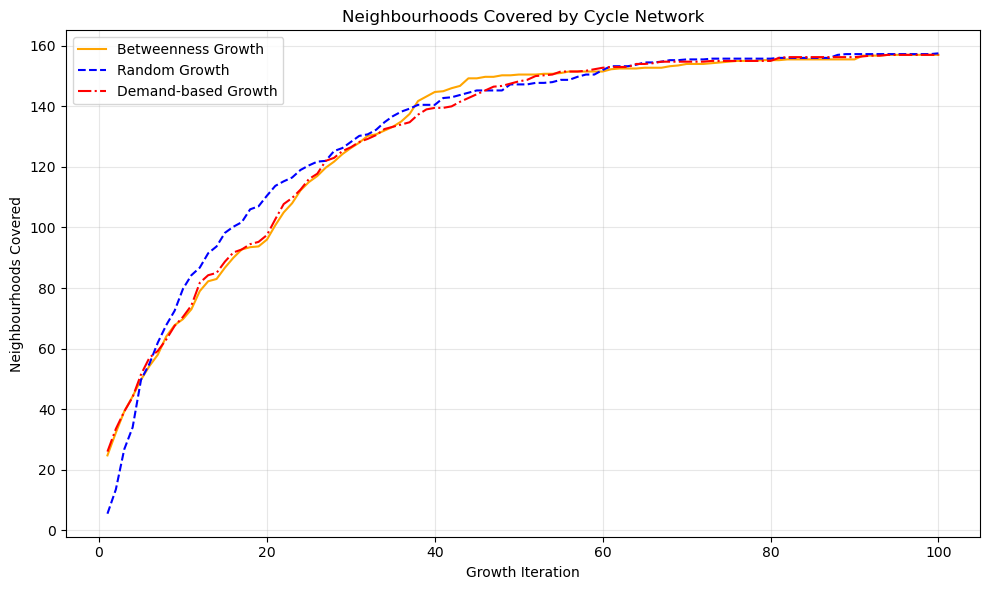

In [32]:
# neighbourhoods
plt.figure(figsize=(10, 6))
x_vals = range(1, len(overall_results['neighborhood_points_covered_GT']) + 1)

plt.plot(
    x_vals,
    overall_results['neighborhood_points_covered_GT'],
    color='orange',
    linestyle='-',
    label='Betweenness Growth'
)
plt.plot(
    x_vals,
    overall_results['neighborhood_points_covered_random'],
    color='blue',
    linestyle='--',
    label='Random Growth'
)
plt.plot(
    x_vals,
    overall_results['neighborhood_points_covered_demand'],
    color='red',
    linestyle='-.',
    label='Demand-based Growth'
)

plt.xlabel('Growth Iteration')
plt.ylabel('Neighbourhoods Covered')
plt.title('Neighbourhoods Covered by Cycle Network')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
output_path = overall_results_path + "/neighbourhoods_coverage_avg.png"
plt.savefig(output_path, dpi=300)

plt.show()

# Overlap

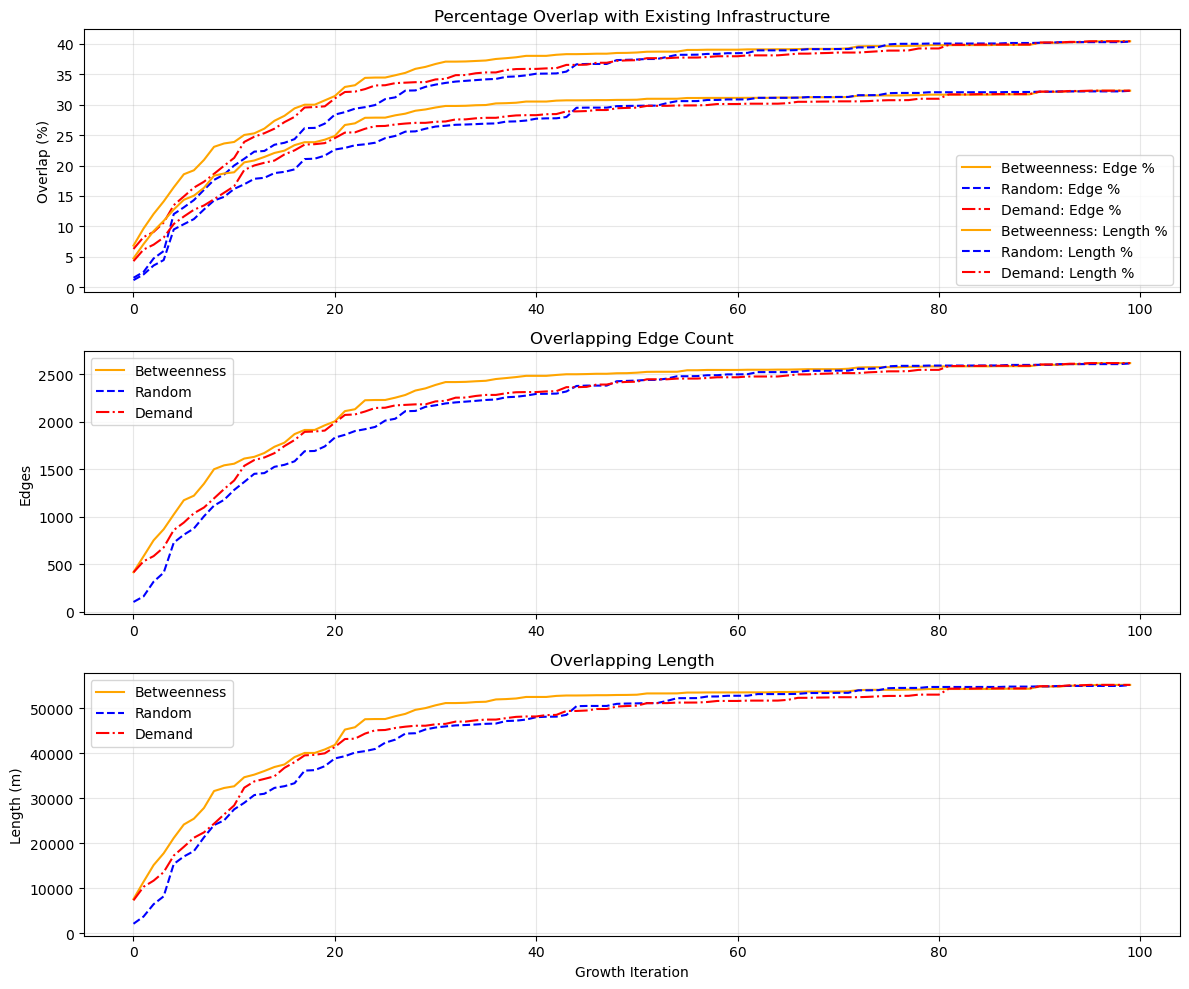

In [33]:
def plot_comparison(overall_results):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

    # 1. Percentage Overlap
    ax1.plot(overall_results['overlap_size_percent_GTs'], color='orange', linestyle='-', label='Betweenness: Edge %')
    ax1.plot(overall_results['overlap_size_percent_random'], color='blue', linestyle='--',  label='Random: Edge %')
    ax1.plot(overall_results['overlap_size_percent_demand'], color='red', linestyle='-.',  label='Demand: Edge %')

    ax1.plot(overall_results['overlap_length_percent_GTs'], color='orange', linestyle='-',  label='Betweenness: Length %')
    ax1.plot(overall_results['overlap_length_percent_random'], color='blue', linestyle='--', label='Random: Length %')
    ax1.plot(overall_results['overlap_length_percent_demand'], color='red', linestyle='-.', label='Demand: Length %')

    ax1.set_title('Percentage Overlap with Existing Infrastructure')
    ax1.set_ylabel('Overlap (%)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Overlapping Edge Count
    ax2.plot(overall_results['overlap_edges_GTs'], color='orange', linestyle='-',  label='Betweenness')
    ax2.plot(overall_results['overlap_edges_random'], color='blue', linestyle='--', label='Random')
    ax2.plot(overall_results['overlap_edges_demand'], color='red', linestyle='-.',  label='Demand')

    ax2.set_title('Overlapping Edge Count')
    ax2.set_ylabel('Edges')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Overlapping Length
    ax3.plot(overall_results['overlap_length_GTs'], color='orange', linestyle='-',  label='Betweenness')
    ax3.plot(overall_results['overlap_length_random'], color='blue', linestyle='--',  label='Random')
    ax3.plot(overall_results['overlap_length_demand'], color='red', linestyle='-.',  label='Demand')

    ax3.set_title('Overlapping Length')
    ax3.set_ylabel('Length (m)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.xlabel('Growth Iteration')
    plt.tight_layout()
    output_path = overall_results_path + "/overlap_with_existing_avg.png"
    plt.savefig(output_path, dpi=300)

    plt.show()


plot_comparison(overall_results)


# Directness

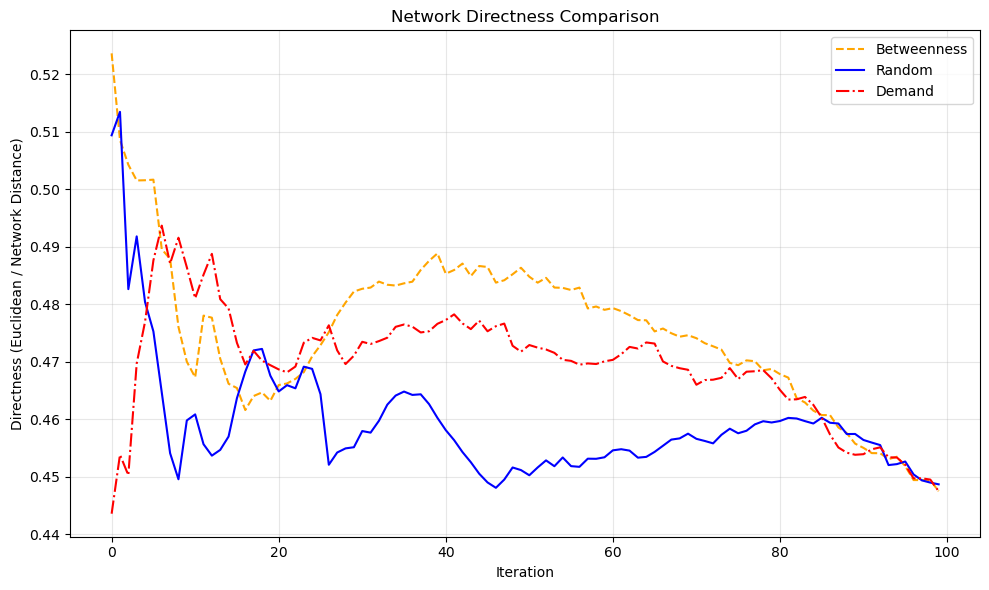

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(
    overall_results['directness'],
    linestyle='--', 
    color='orange', 
    label='Betweenness'
)
plt.plot(
    overall_results['directness_random'],
    linestyle='-', 
    color='blue', 
    label='Random'
)
plt.plot(
    overall_results['directness_demand'],
    linestyle='-.', 
    color='red', 
    label='Demand'
)

plt.xlabel('Iteration')
plt.ylabel('Directness (Euclidean / Network Distance)')
plt.title('Network Directness Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
output_path = overall_results_path + "/directness_avg.png"
plt.savefig(output_path, dpi=300)
plt.show()

# Effieciency

In [ ]:
# global efficiency

plt.figure(figsize=(10, 6))
plt.plot(
    overall_results['efficiency'],
    linestyle='-', 
    color='orange',
    label='Betweenness'
)
plt.plot(
    overall_results['efficiency_random'],
    linestyle='--', 
    color='blue',
    label='Random'
)
plt.plot(
    overall_results['efficiency_demand'],
    linestyle='-.', 
    color='red',
    label='Demand'
)

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Global Efficiency', fontsize=12)
plt.title('Global Network Efficiency Comparison', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

output_path = PATH["plots"] + "/" + placeid + "/global_eff.png"
plt.savefig(output_path, dpi=300)
plt.show()

In [35]:
Audio(sound_file, autoplay=True) 